# Cross league comparisons

If we define our PCA decompostion based on the Premier League, can we expect roughly similar distributions of players in other leagues?

Say, there will be a certain distribution of central-vs-wing play. Do we expect the same distribution in La Liga? Or Serie A?

To investigate, we will decompose each league and compare PCs

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append("..")

In [2]:
from feature_utils import load_season_data

year = 2022

season = f"{year}-{year+1}"
leagues = ['Premier League', 'La Liga', 'Ligue 1', 'Bundesliga', 'Serie A']

data = {league: load_season_data(league, season).query("pos != 'GK'") for league in leagues}
reference_data = load_season_data('Premier League', '2017-2018').query("pos != 'GK'")

In [3]:
data['La Liga']

,season,team,nation,pos,age,90s,standard_sot%,standard_dist,expected_npxg/sh,aerial_duels_won%,...,succ_takeons_vs_team,carries_per_game_vs_team,distance_per_carry,prg_distance_per_carry,prg_distance_pct,prg_carry_pct,carries3rd_per_carries,carries_pa_per_carries,receives_per_game_vs_team,prgreceives_per_game_vs_team
player,,,,,,,,,,,,,,,,,,,,,
Nemanja Gudelj,2022-2023,Sevilla,rs SRB,"DF,MF",30.0,30.9,23.7,25.8,0.05,67.1,...,1.259406,1.101982,5.329102,3.076156,0.577237,0.026292,0.033545,0.000000,1.134617,0.054255
Óliver Torres,2022-2023,Sevilla,es ESP,"MF,FW",27.0,23.7,31.8,17.1,0.12,28.0,...,0.749347,1.154099,4.629797,2.037246,0.440029,0.042889,0.053047,0.006772,1.134370,1.839166
Jesús Navas,2022-2023,Sevilla,es ESP,"DF,FW",36.0,22.0,30.0,24.8,0.03,34.9,...,1.049505,1.216617,5.207612,2.423299,0.465338,0.053057,0.038062,0.010381,1.217037,2.629011
Marcos Acuña,2022-2023,Sevilla,ar ARG,DF,30.0,21.2,23.8,25.6,0.06,62.5,...,1.009624,1.198455,4.945322,2.646416,0.535135,0.059538,0.052248,0.006075,1.168500,1.238901
Ivan Rakitić,2022-2023,Sevilla,hr CRO,MF,34.0,19.9,27.6,27.3,0.06,50.0,...,0.764040,1.321734,4.381455,2.350939,0.536566,0.049296,0.041080,0.002347,1.381311,1.179427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mamadou Fall,2022-2023,Villarreal,sn SEN,DF,19.0,0.3,0.0,0.0,0.00,0.0,...,0.000000,0.968198,3.900000,1.600000,0.410256,0.000000,0.000000,0.000000,0.681212,0.000000
Fernando Niño,2022-2023,Villarreal,es ESP,"MF,FW",21.0,0.2,0.0,11.9,0.08,0.0,...,0.000000,1.161837,3.500000,0.125000,0.035714,0.000000,0.000000,0.000000,1.149545,5.170068
Pascu,2022-2023,Villarreal,es ESP,"DF,FW",19.0,0.1,100.0,18.0,0.14,0.0,...,0.000000,2.323675,6.375000,3.875000,0.607843,0.125000,0.125000,0.000000,2.043635,5.170068


----
----
----

## Filtering relevant players and combining all leagues to arrive at a consistent Power Transform

In [4]:
MIN_90S = 5.0

X_trains = dict()
for league, data_df in data.items():
    X_train = data_df
    X_train = X_train[X_train['90s'] >= MIN_90S]
    X_train = X_train.iloc[:, 6:]
    X_trains[league] = X_train

X_train_ref = reference_data
X_train_ref = X_train_ref[X_train_ref['90s'] >= MIN_90S]
X_train_ref = X_train_ref.iloc[:, 6:]


X_trains['Serie A'].drop(index='Ronaldo Vieira', inplace=True) # The guy's data is missing
X_train_all = pd.concat(X_trains.values(), axis=0)
X_train_all

,standard_sot%,standard_dist,expected_npxg/sh,aerial_duels_won%,g_xg_ratio,cmp_pass_vs_team,avg_pass_distance,avg_pass_prg_distance,short_pass_cmp_pct,medium_pass_cmp_pct,...,succ_takeons_vs_team,carries_per_game_vs_team,distance_per_carry,prg_distance_per_carry,prg_distance_pct,prg_carry_pct,carries3rd_per_carries,carries_pa_per_carries,receives_per_game_vs_team,prgreceives_per_game_vs_team
player,,,,,,,,,,,,,,,,,,,,,
Pascal Groß,48.7,17.4,0.14,21.7,1.666667,0.970125,16.062799,4.670569,0.525812,0.362427,...,1.029005,1.033063,4.626979,2.150723,0.464822,0.042670,0.035788,0.005506,1.120086,1.327529
Lewis Dunk,13.6,11.7,0.08,59.1,0.588235,1.093662,18.838543,6.850567,0.366197,0.523875,...,1.598454,1.631002,4.973845,2.758065,0.554514,0.008282,0.009154,0.000000,1.581082,0.031759
Moisés Caicedo,28.6,23.9,0.06,64.9,0.588235,1.071861,15.141495,4.032112,0.557953,0.342699,...,1.036997,1.105227,4.127405,1.908427,0.462379,0.025216,0.021234,0.003981,1.192599,0.399673
Alexis Mac Allister,35.0,22.5,0.09,61.0,0.826446,1.041582,15.722573,3.946406,0.534048,0.372636,...,1.164873,1.051728,4.651251,2.329037,0.500733,0.052312,0.056103,0.006065,1.127263,0.548512
Solly March,41.9,16.2,0.11,43.3,0.864198,0.878078,17.929548,4.233438,0.465825,0.385910,...,1.017016,0.867874,6.650391,3.001953,0.451395,0.107422,0.046875,0.045898,0.819196,2.703095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Lorenzo Venuti,57.1,22.1,0.06,52.6,0.000000,1.032621,17.967807,5.142857,0.436620,0.458753,...,1.016150,1.099601,5.010989,2.563187,0.511513,0.065934,0.052198,0.005495,1.174799,1.085905
Riccardo Sottil,38.1,19.9,0.05,37.5,0.000000,0.994657,16.540670,2.650718,0.488038,0.401914,...,0.562947,1.010404,9.344371,5.125828,0.548547,0.215232,0.115894,0.092715,0.932323,3.440191
Aleksa Terzić,20.0,24.8,0.04,43.8,2.500000,1.017436,18.128866,5.503436,0.443299,0.410653,...,1.205154,1.448048,7.134298,4.051653,0.567912,0.101240,0.057851,0.008264,1.348186,1.525657


### Running power transform to normalize features 

In [5]:
from sklearn.preprocessing import PowerTransformer

power_transform = PowerTransformer(method='yeo-johnson')
power_transform.fit(X_train_ref)
X_train_transformed = power_transform.transform(X_train_all)
X_train_transformed = pd.DataFrame(index=X_train_all.index, columns=X_train_all.columns, data=X_train_transformed)

### Distinct PCAs on transformed feature space every season

In [6]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(power_transform.transform(X_train_ref))
X_train_decomposed = pca.transform(X_train_transformed)
X_train_decomposed = pd.DataFrame(index=X_train_transformed.index, columns=(f"PC{i}" for i in range(1, len(X_train_transformed.columns) + 1)), data=X_train_decomposed)

/home/cez/coding/pca_football_profiling/.venv/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


# Investigating distributions of specific PCs among different leagues

I would like to see whether distributions of PCs associated with specific traits are meaningfully different league-by-league

In [7]:
X_train_decomposed

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52
player,,,,,,,,,,,,,,,,,,,,,
Pascal Groß,1.438010,-0.992221,-0.366735,-0.151415,1.572330,-0.085238,2.453116,-0.655805,-0.917857,-0.378212,...,-0.038009,0.012395,-0.016441,0.161333,0.201986,-0.063648,0.079204,-0.084047,0.056893,0.011661
Lewis Dunk,-6.648627,2.133882,-0.758257,2.166089,-0.823942,-3.666821,0.973575,0.971239,1.187843,-0.073893,...,0.022235,-0.207887,-0.279429,0.180852,0.100361,0.401620,-0.007725,0.173206,-0.076551,0.050630
Moisés Caicedo,-2.436212,-1.818702,-2.744816,-2.657620,-0.113278,-0.279622,0.273089,0.033219,0.027969,0.366318,...,0.004044,-0.070302,0.312117,-0.069217,0.196741,-0.298607,0.056298,-0.059225,-0.014318,-0.009763
Alexis Mac Allister,0.088096,-1.284192,-2.613807,-0.929312,-0.621690,0.020971,0.280815,0.145314,-0.655915,-0.074262,...,-0.134873,-0.231811,0.436742,-0.055773,0.202107,-0.099996,0.128069,-0.208522,0.069929,-0.040088
Solly March,4.181361,-0.948720,2.055873,1.473376,0.732370,2.842857,0.963650,-0.790961,0.287697,0.331471,...,0.026758,0.095592,0.256331,-0.006886,-0.202385,-0.198796,-0.100737,0.186912,0.211127,-0.039141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Lorenzo Venuti,-1.966340,-1.478778,1.963986,-0.408551,0.959945,-1.579975,1.332331,-0.574246,-0.272015,-0.598484,...,-0.067726,0.073241,0.000137,-0.246710,0.166179,0.015050,-0.070197,0.063090,0.203249,-0.015939
Riccardo Sottil,7.421425,0.564027,2.391943,4.589732,-2.270496,-0.419104,-2.188359,-1.528740,-0.425740,0.761697,...,0.100455,-0.507845,-0.042828,0.087007,0.085649,0.516219,0.276254,0.436801,0.138429,-0.068862
Aleksa Terzić,-0.582510,-4.321582,3.351810,1.461581,-0.781539,-1.816803,2.212134,-0.449786,0.737465,-0.718487,...,0.378959,0.203017,0.156461,-0.053577,-0.122668,0.239551,0.193936,0.123572,-0.042064,0.074548


In [8]:
pc_distributions = dict()

for league in leagues:
    league_players = X_trains[league].index
    for pc in range(1, 9):
        distribution = X_train_decomposed.loc[league_players][f'PC{pc}']
        pc_distributions[(league, pc)] = np.array(distribution)

In [9]:
# Get the default matplotlib color cycle
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
league_colors = dict(zip(leagues, color_cycle[:len(leagues)]))
pc_names = {
    1: "Defence vs Offence",
    2: "Agility vs Athleticism",
    3: "Centre vs Wing",
    4: "Off the ball vs On the ball",
    5: "Carrying vs Passing",
    6: "Ball-winning vs Metronome",
    7: "Dead ball & Finishing vs Live play progression",
    8: "Ball distribution range"
}

In [10]:
from matplotlib.ticker import FixedLocator


def draw_barplot(dictionary, pc):
    leagues = []
    values = []
    for (league, n_pc), distribution in dictionary.items():
        if n_pc == pc:
            leagues.append(league)
            values.append(distribution)

    averages = [np.mean(v) for v in values]
    stds = [np.std(v) for v in values]

    # Sort leagues and averages in descending order
    sorted_indices = np.argsort(averages)
    leagues = [leagues[i] for i in sorted_indices]
    averages = [averages[i] for i in sorted_indices]
    stds = [stds[i] for i in sorted_indices]
    formatted_averages = [f"{averages[i]:.2f} ({stds[i]:.2f})" for i in range(len(averages))]

    fig, ax = plt.subplots(figsize=(20, 6))
    bars = ax.bar(leagues, averages, edgecolor='black')
    
    # Assign colors to bars based on the league-color dictionary
    for bar, league in zip(bars, leagues):
        if league in league_colors:
            bar.set_color(league_colors[league])

    offset = np.max(np.abs(averages)) * 0.15
    ax.set_ylim(min(averages) - offset, max(averages) + offset)
    ax.set_xlabel('Football League')
    ax.set_ylabel('Average (Std) PC value')
    ax.set_title(f'PC{pc}: {pc_names[pc]}')
    ax.set_xticks(range(len(leagues)))
    ax.xaxis.set_major_locator(FixedLocator(range(len(leagues))))
    ax.set_xticklabels(leagues, rotation=45, ha='right')
    ax.grid(True)

    for i, v in enumerate(averages):
        if v >= 0:
            ax.text(i, v + 0.01, formatted_averages[i], ha='center', va='bottom', fontweight='bold')
        else:
            ax.text(i, v - 0.01, formatted_averages[i], ha='center', va='top', fontweight='bold')


    plt.tight_layout()
    plt.show()

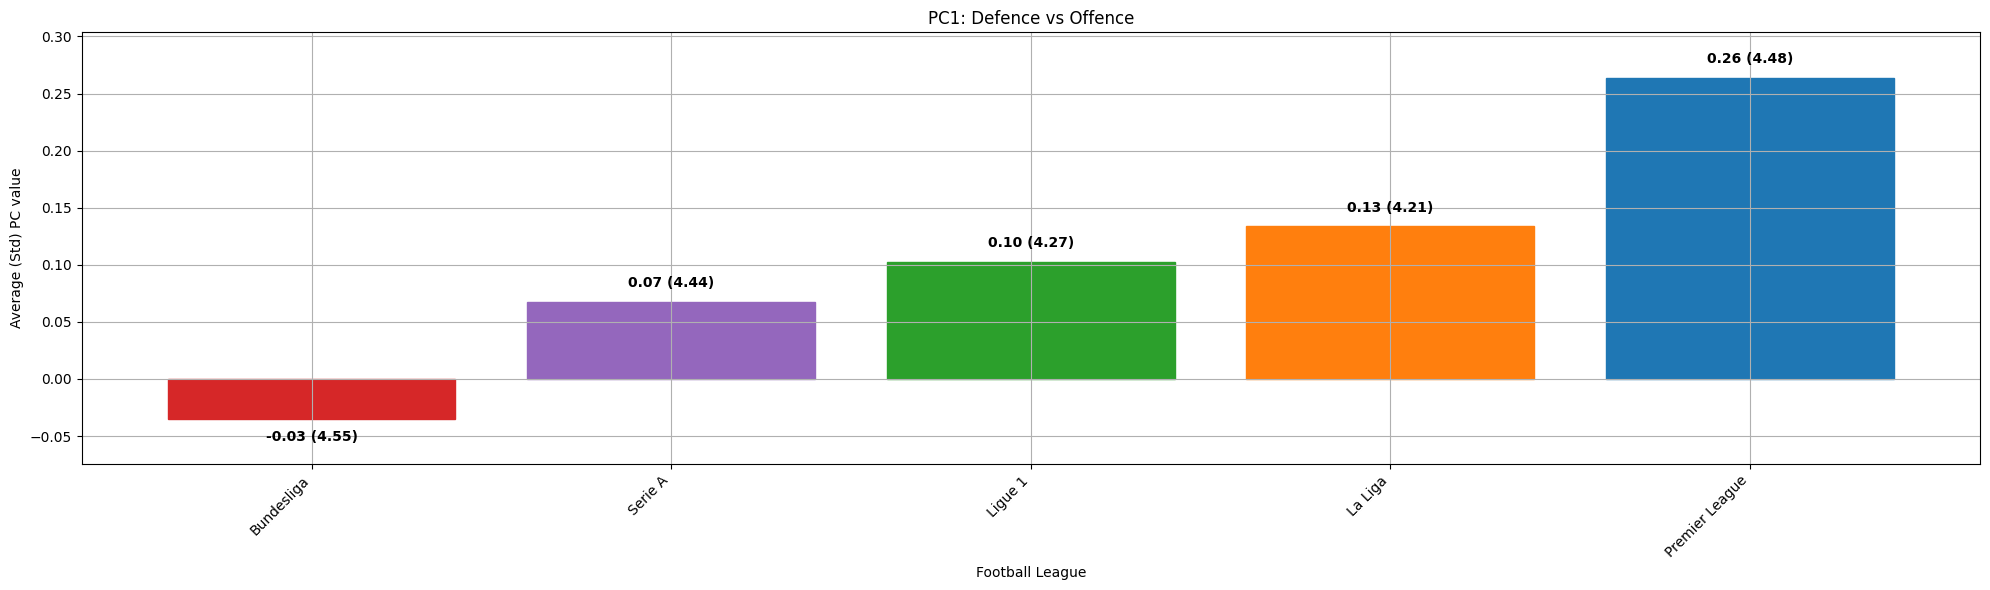

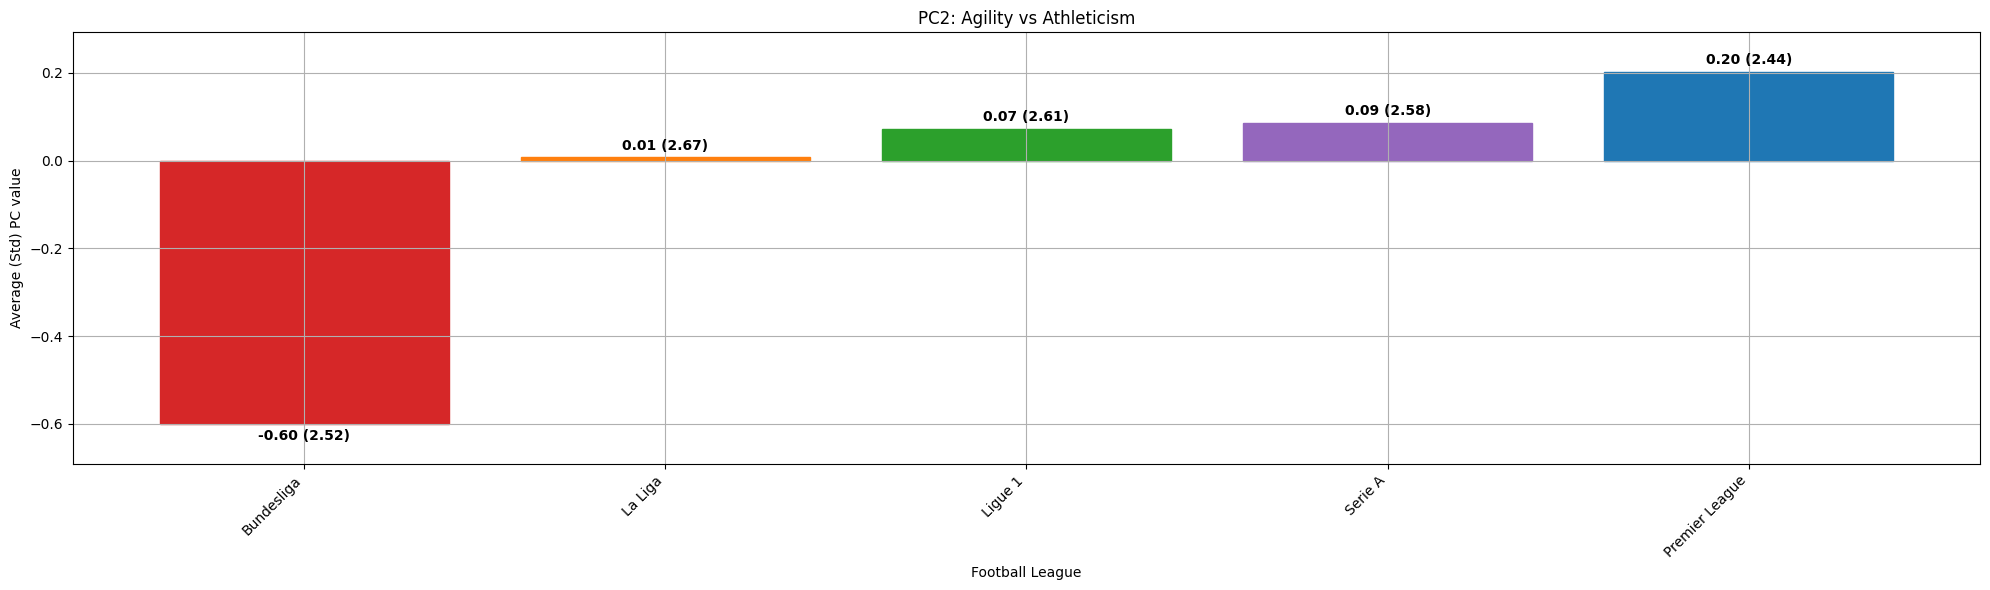

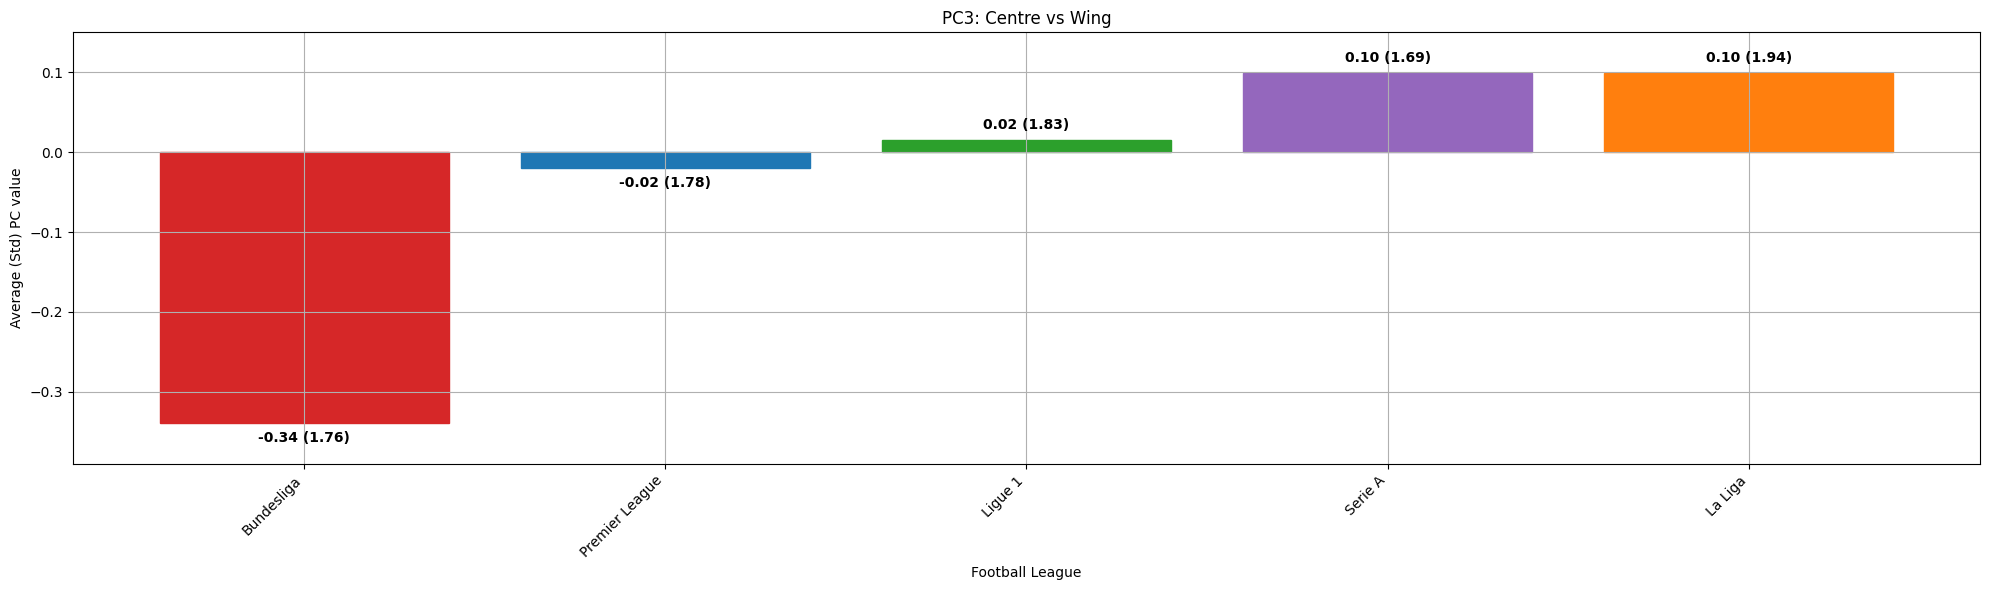

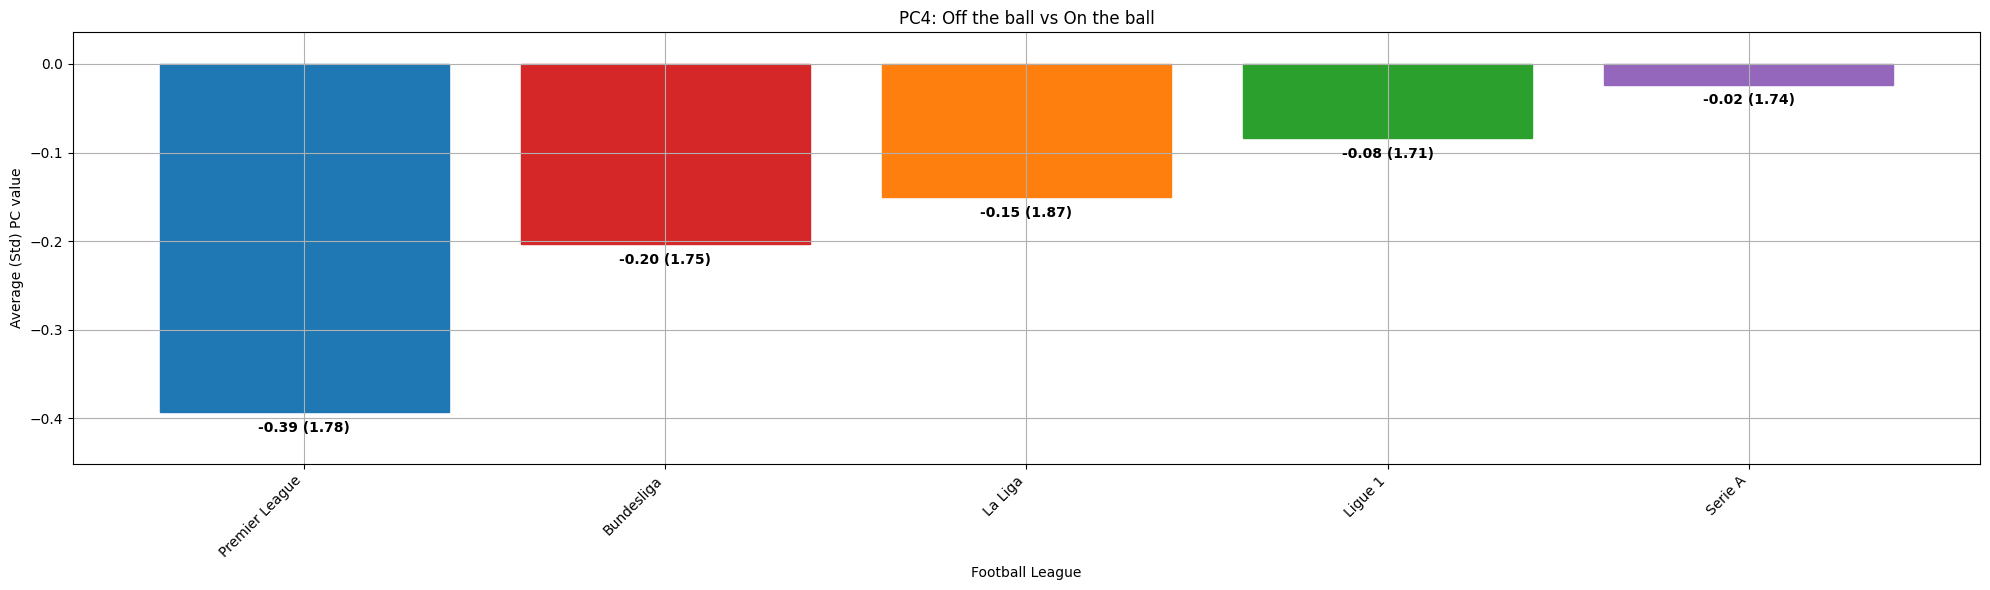

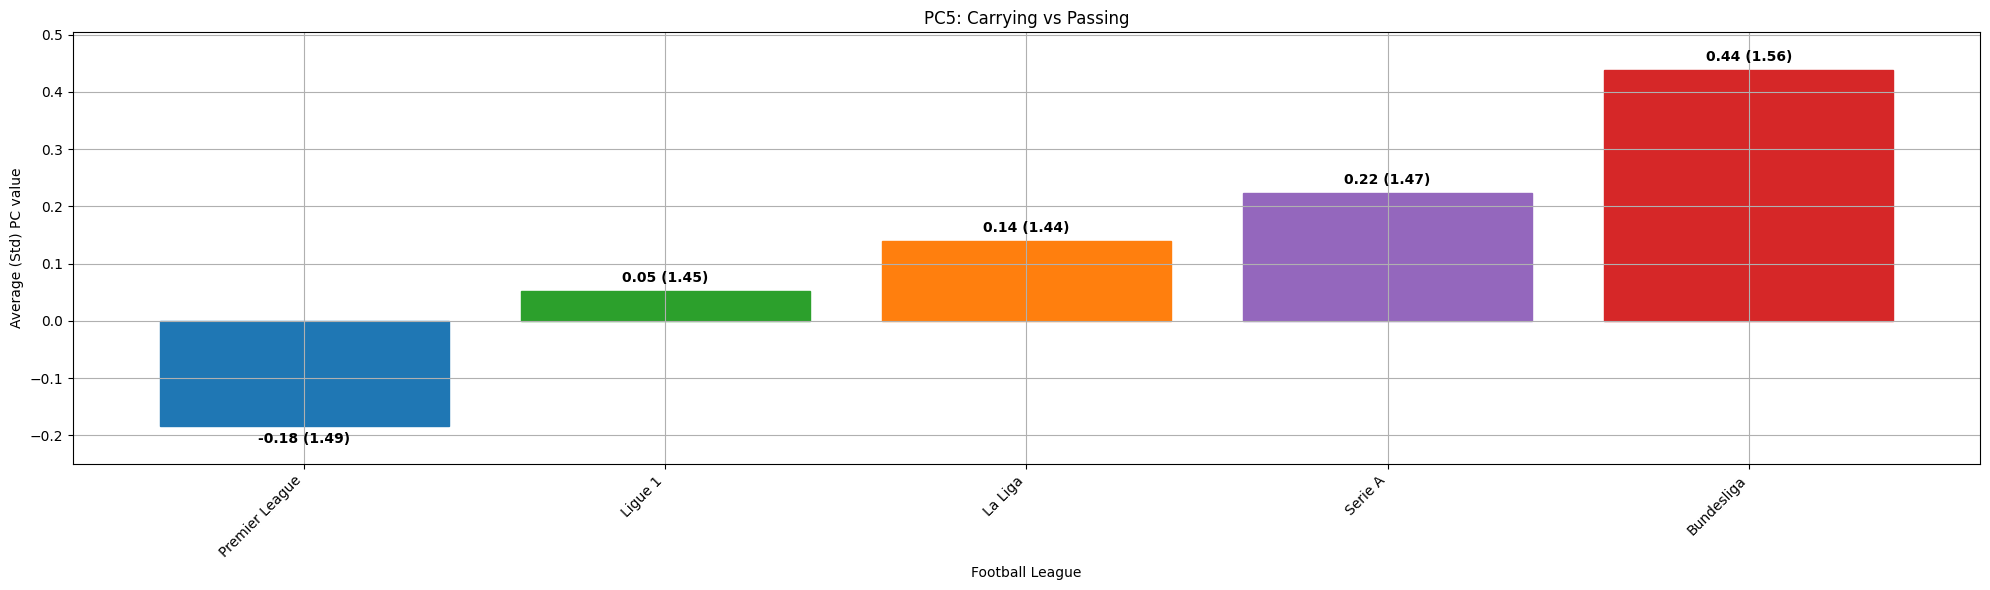

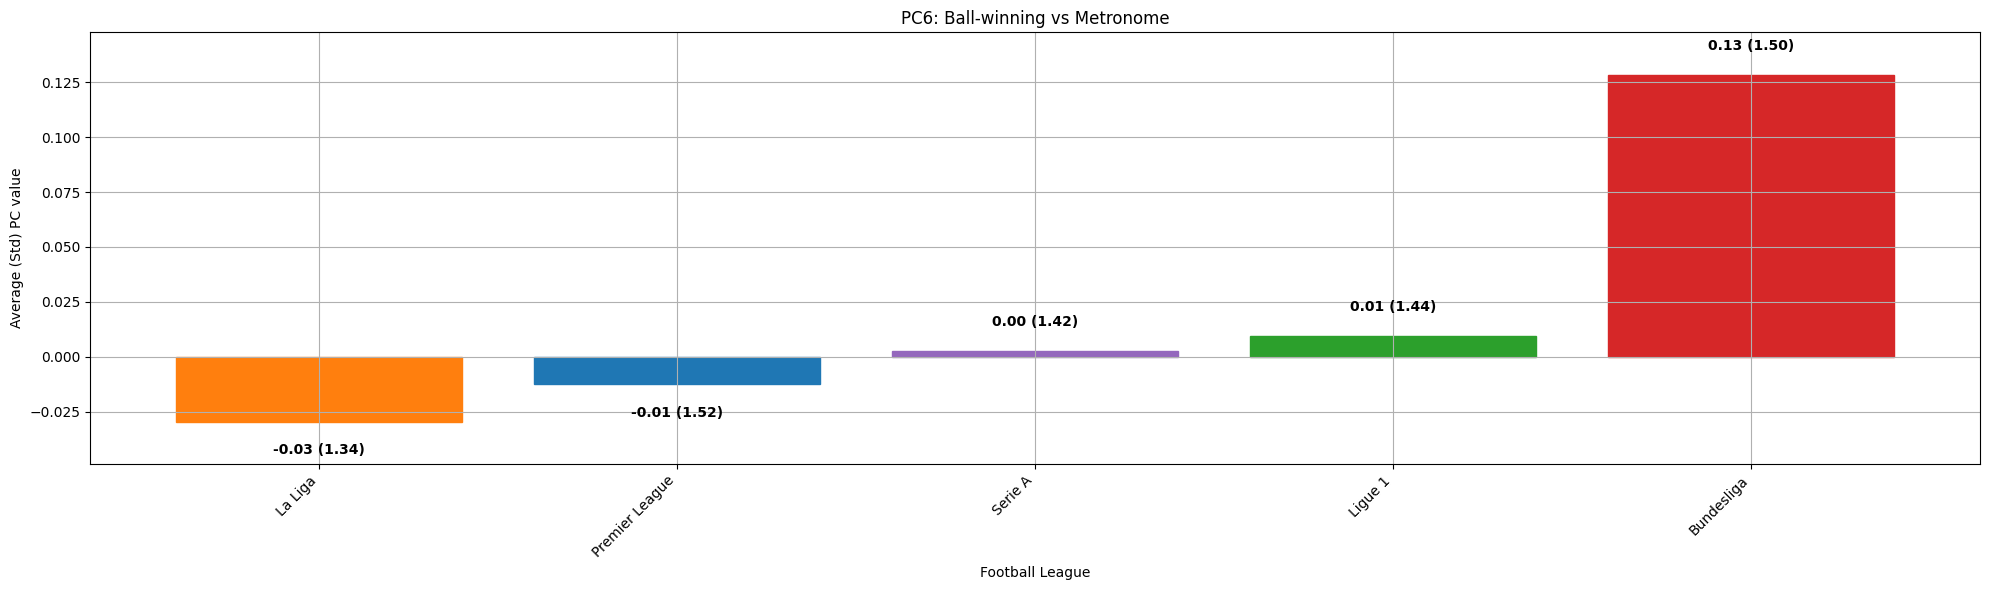

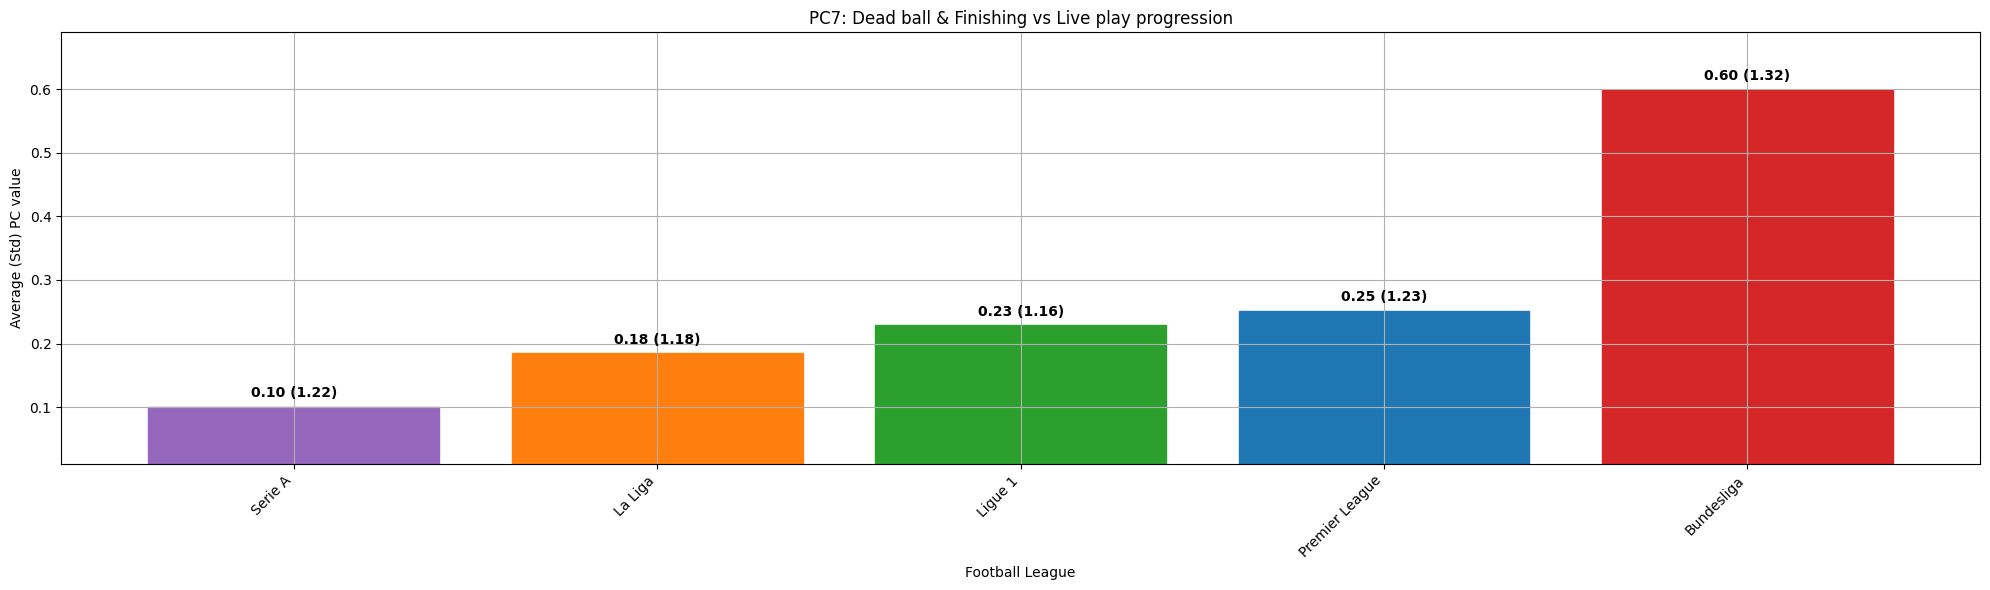

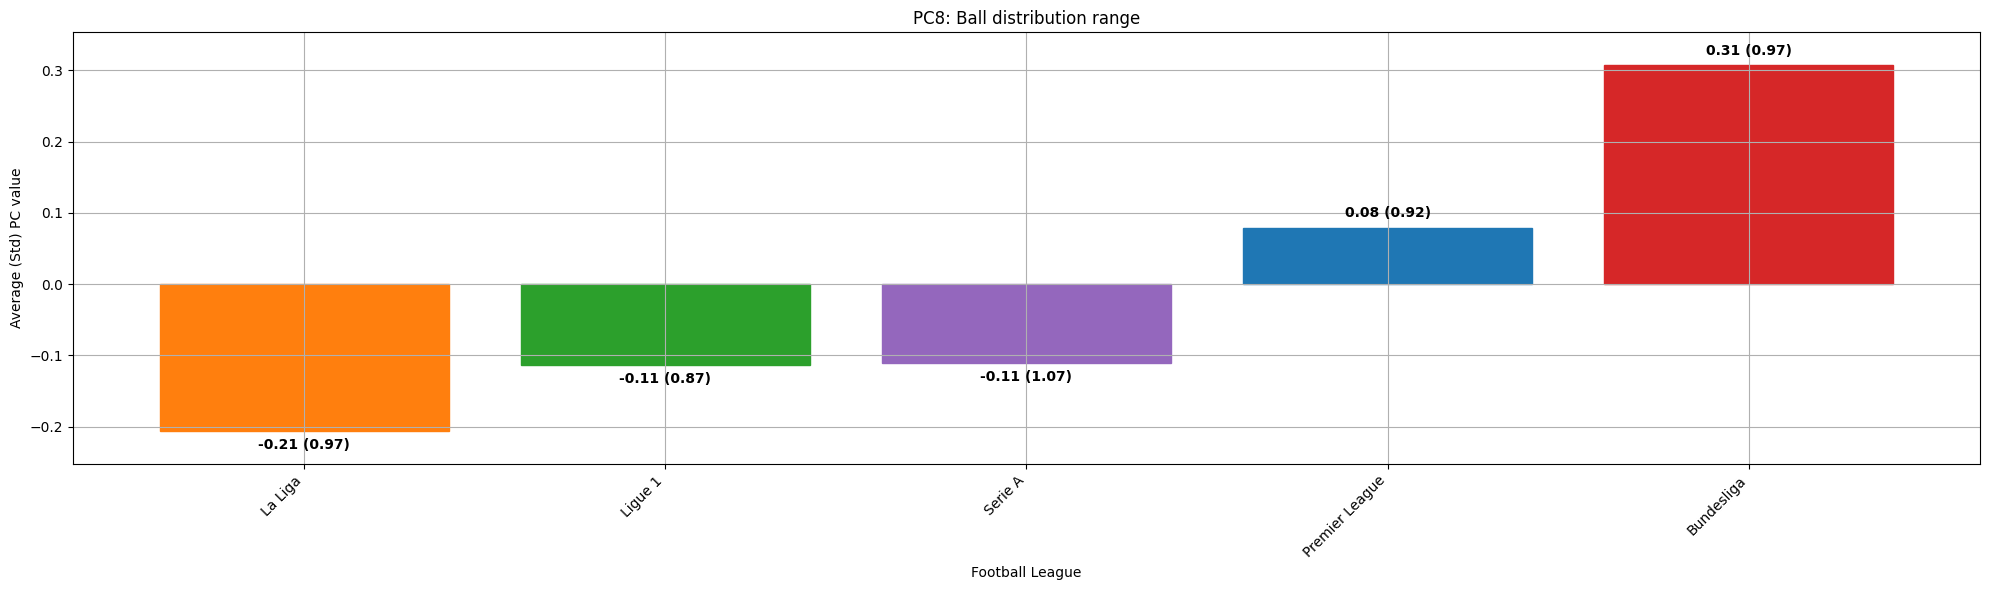

In [11]:
for i in range(1, 9):
    draw_barplot(pc_distributions, i)

PC1 means
Premier League: 0.2639939574205891
La Liga: 0.13368241430421102
Bundesliga: -0.03477476870712612


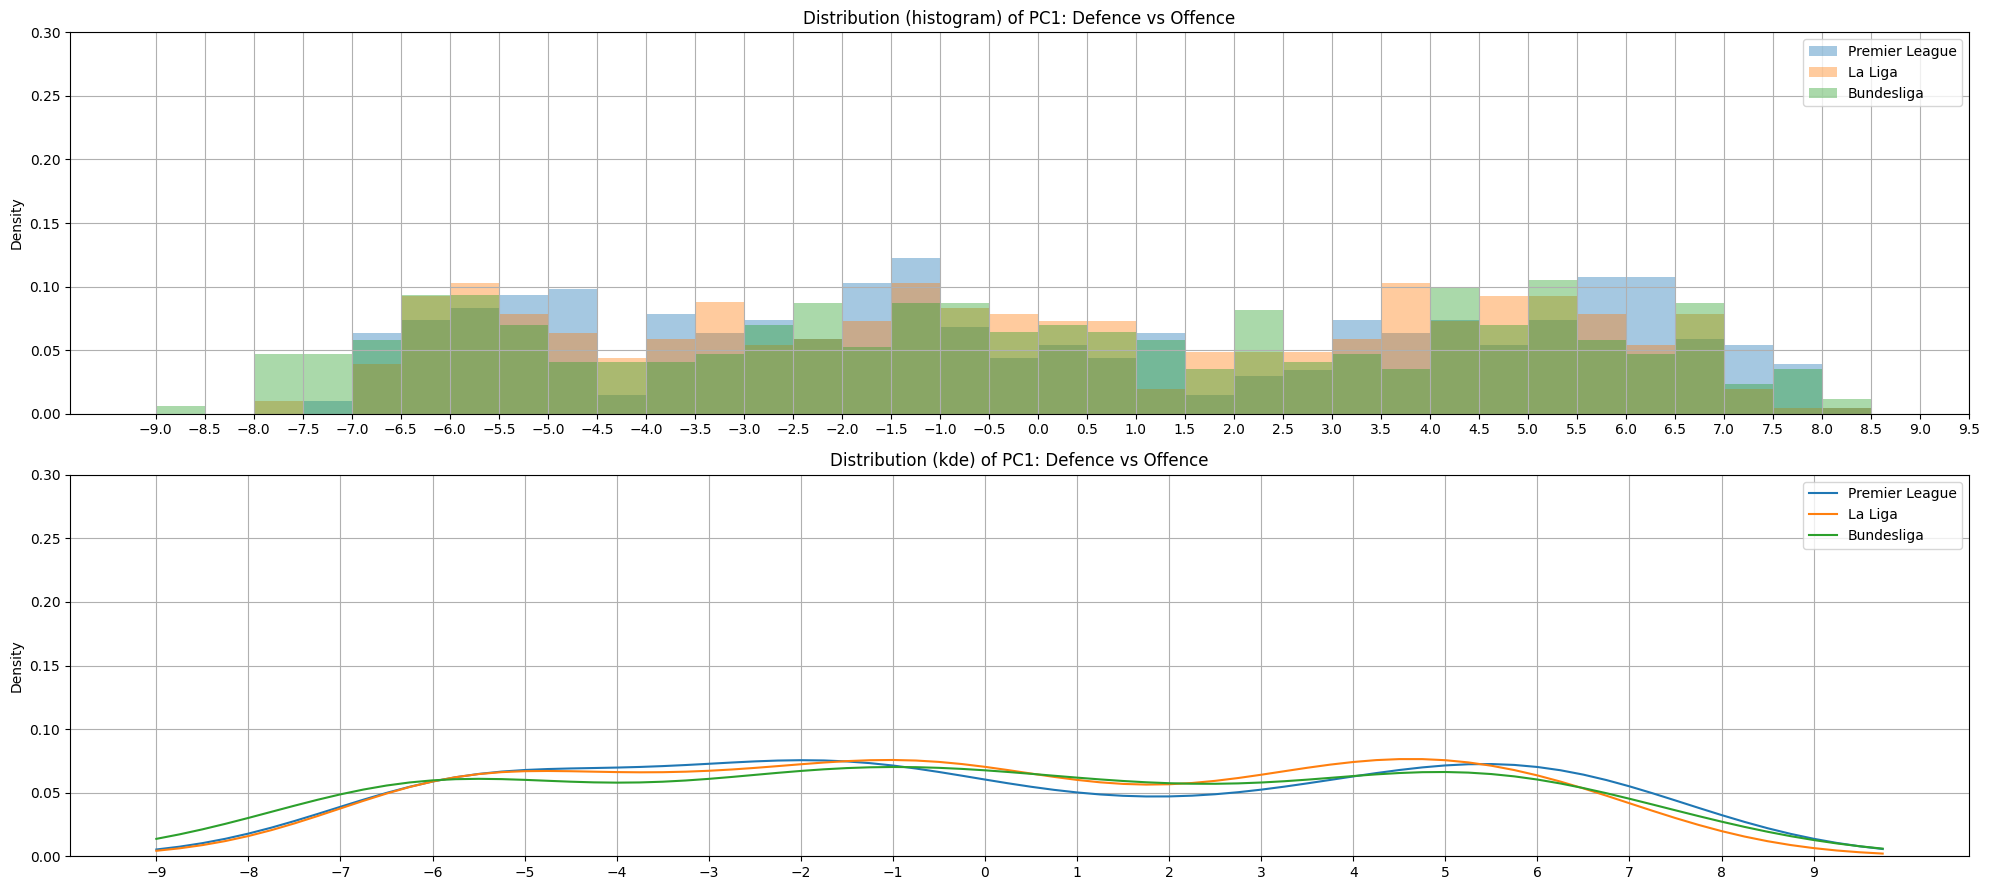

PC2 means
Premier League: 0.2024832152712059
La Liga: 0.00801432503367957
Bundesliga: -0.6008769541628196


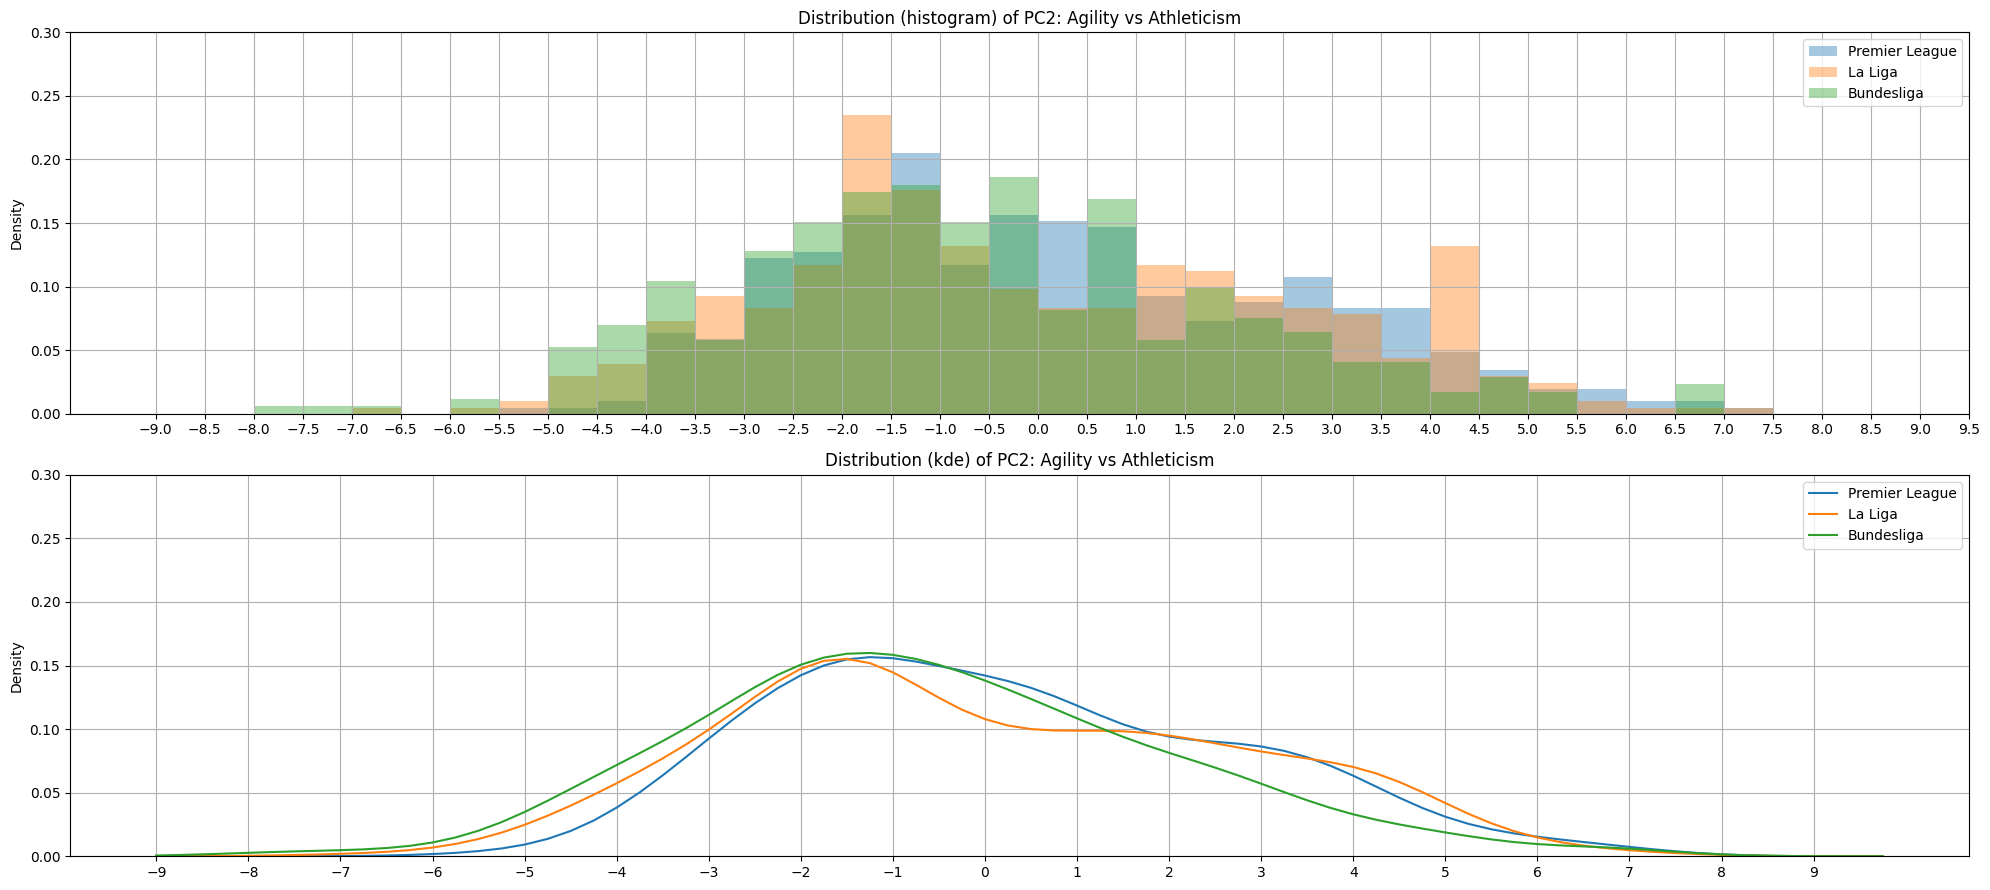

PC3 means
Premier League: -0.020351648399347985
La Liga: 0.09918737851370127
Bundesliga: -0.33944845804908175


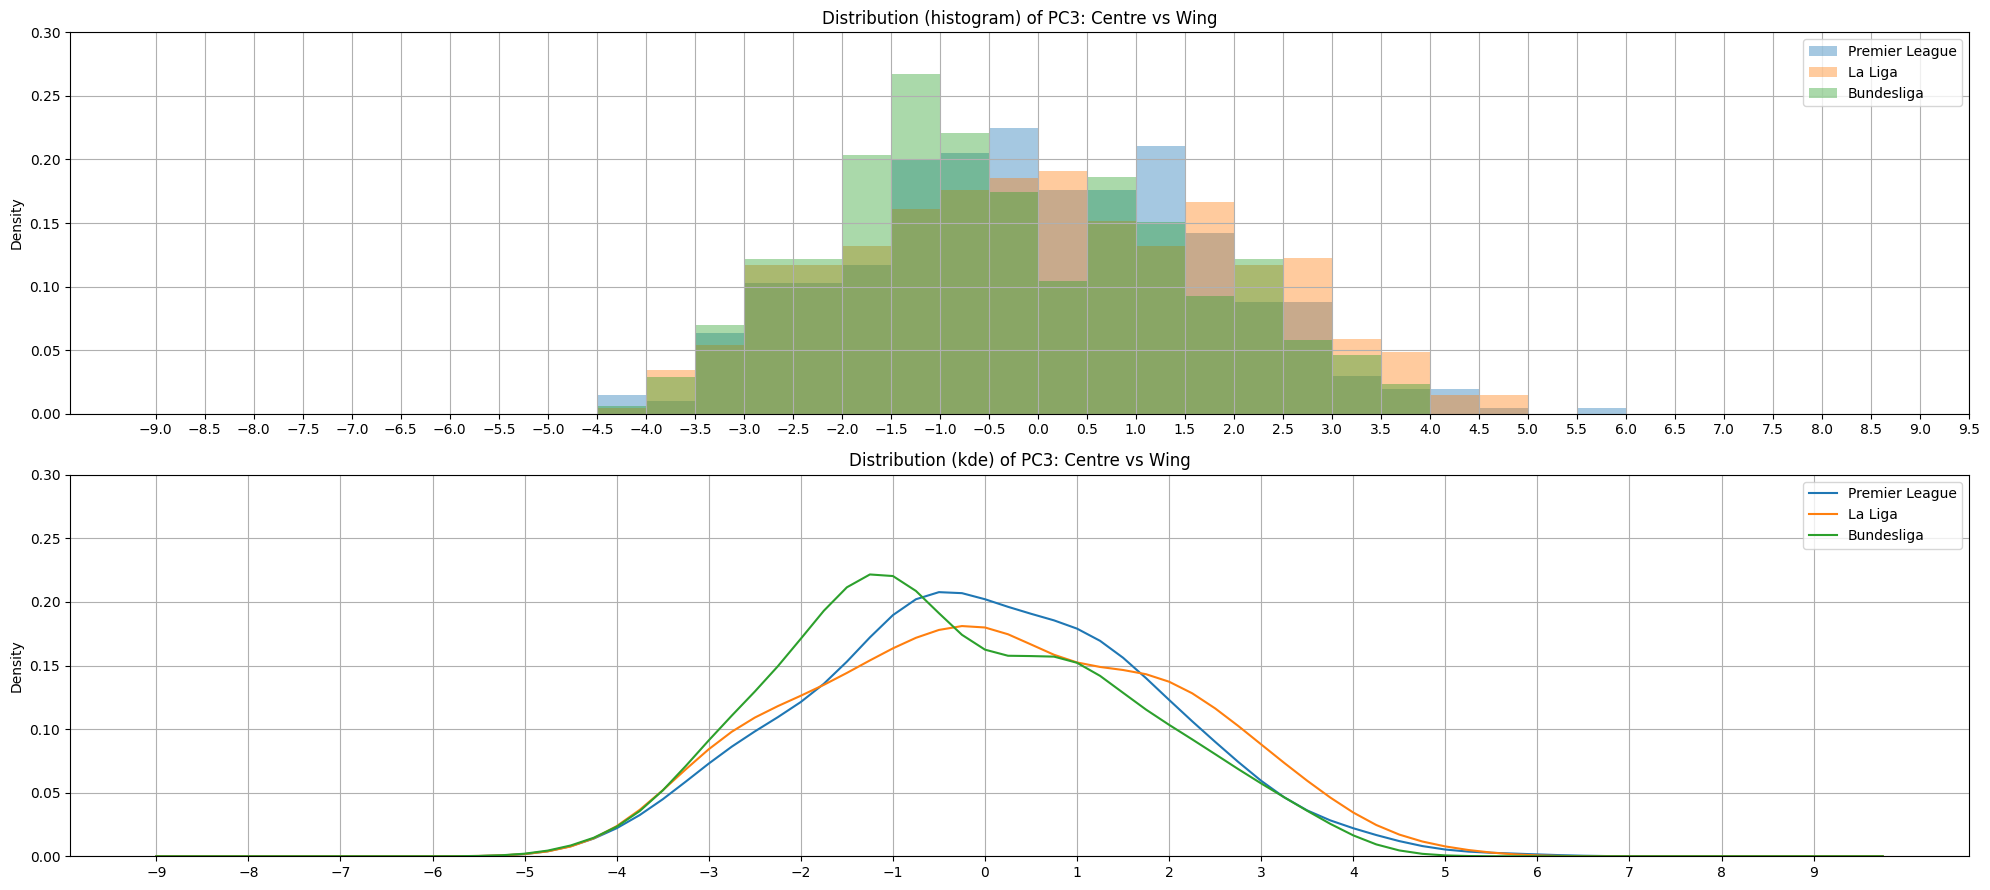

PC4 means
Premier League: -0.39231299978532164
La Liga: -0.1501454378637583
Bundesliga: -0.20350676311346744


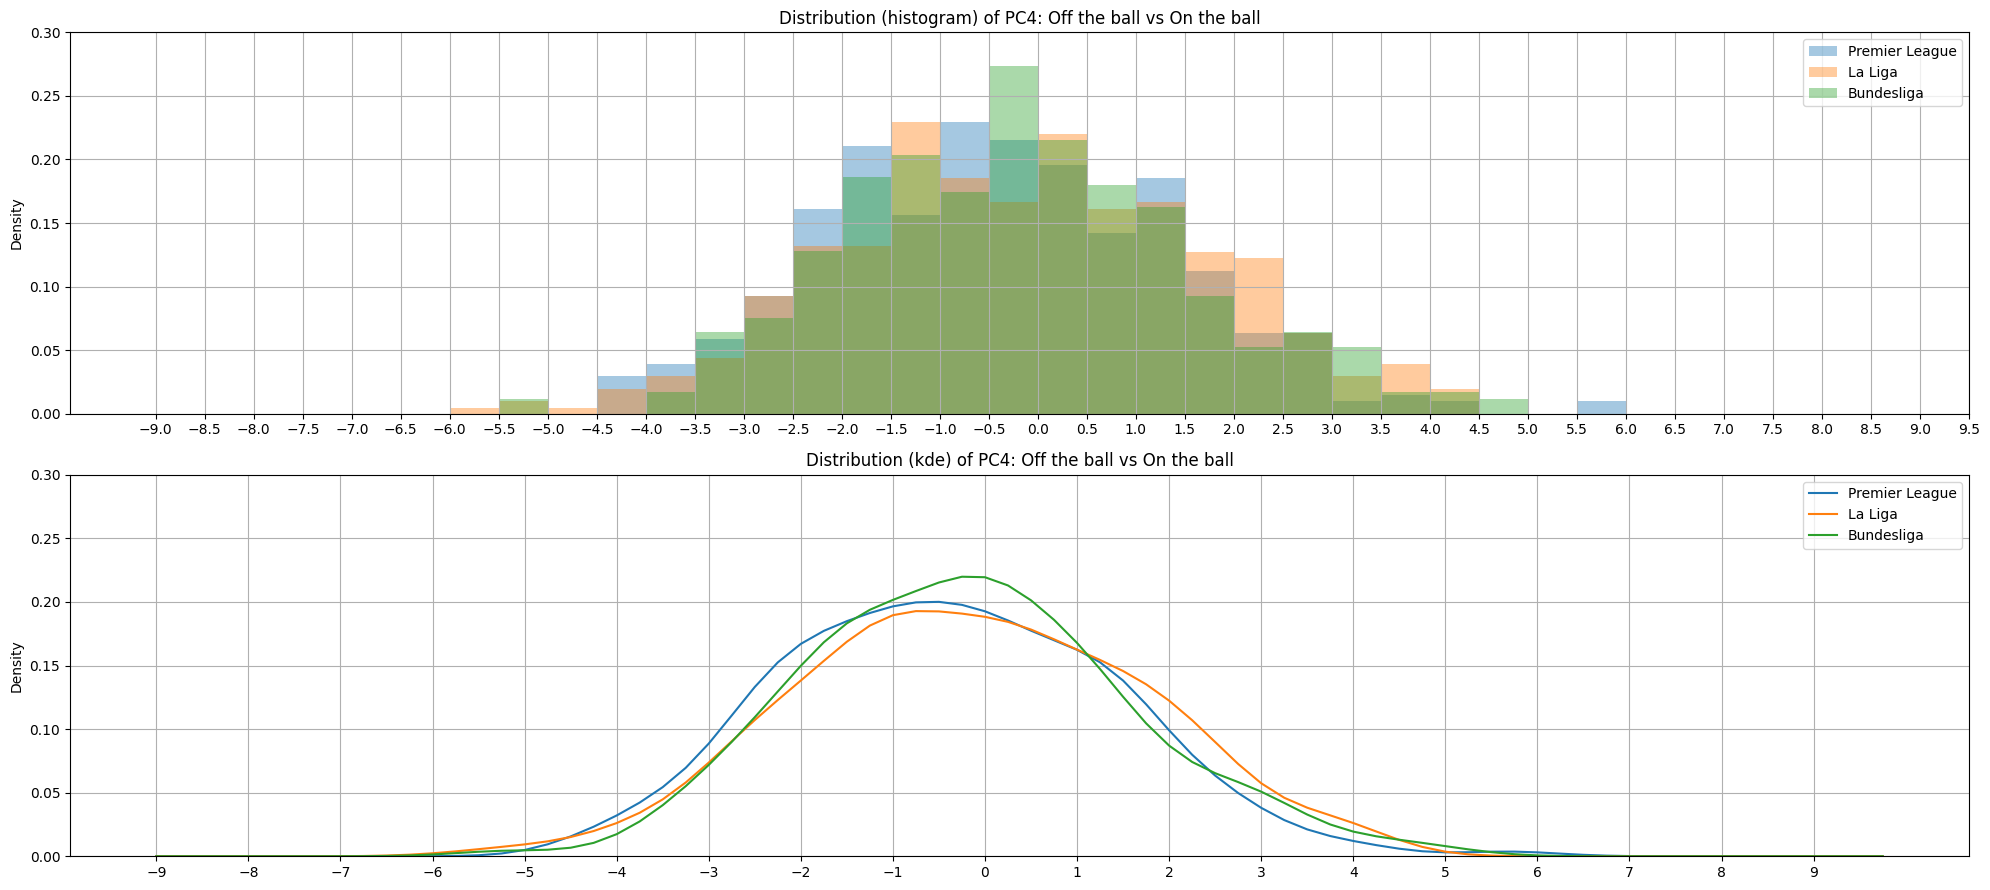

PC5 means
Premier League: -0.18422433230524454
La Liga: 0.13896774412658244
Bundesliga: 0.4381417501090096


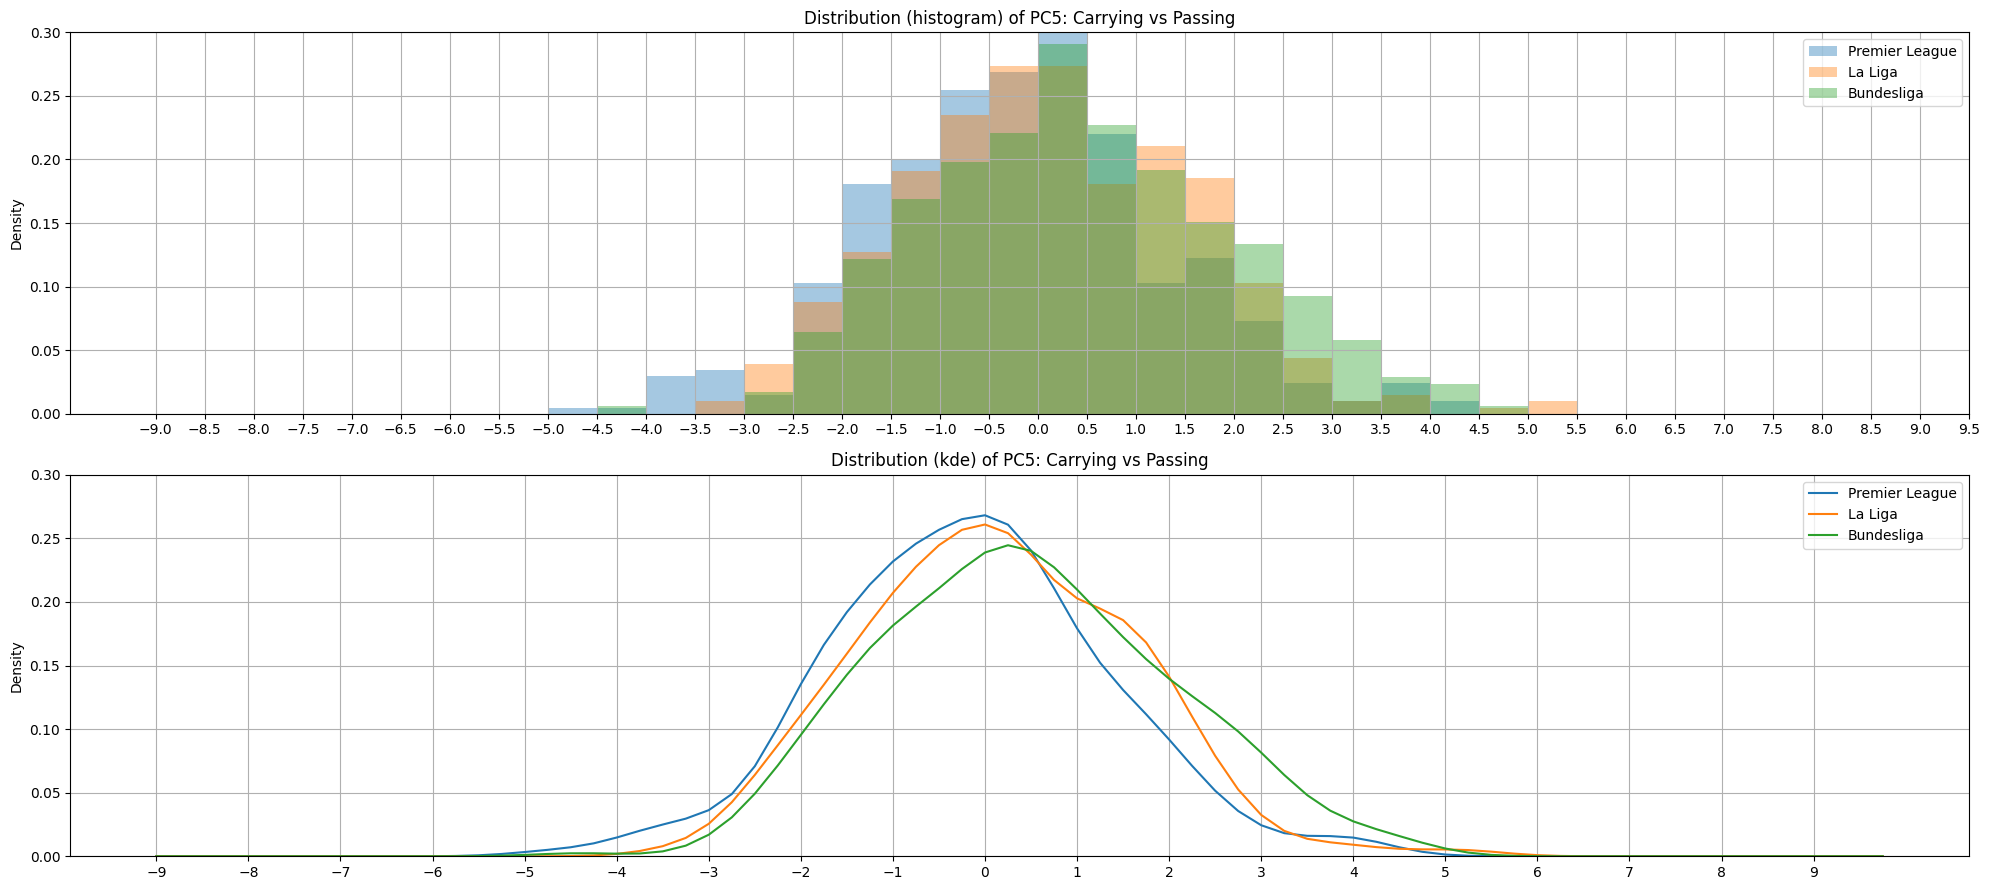

PC6 means
Premier League: -0.01221920799810703
La Liga: -0.029494309436218443
Bundesliga: 0.1284976142451175


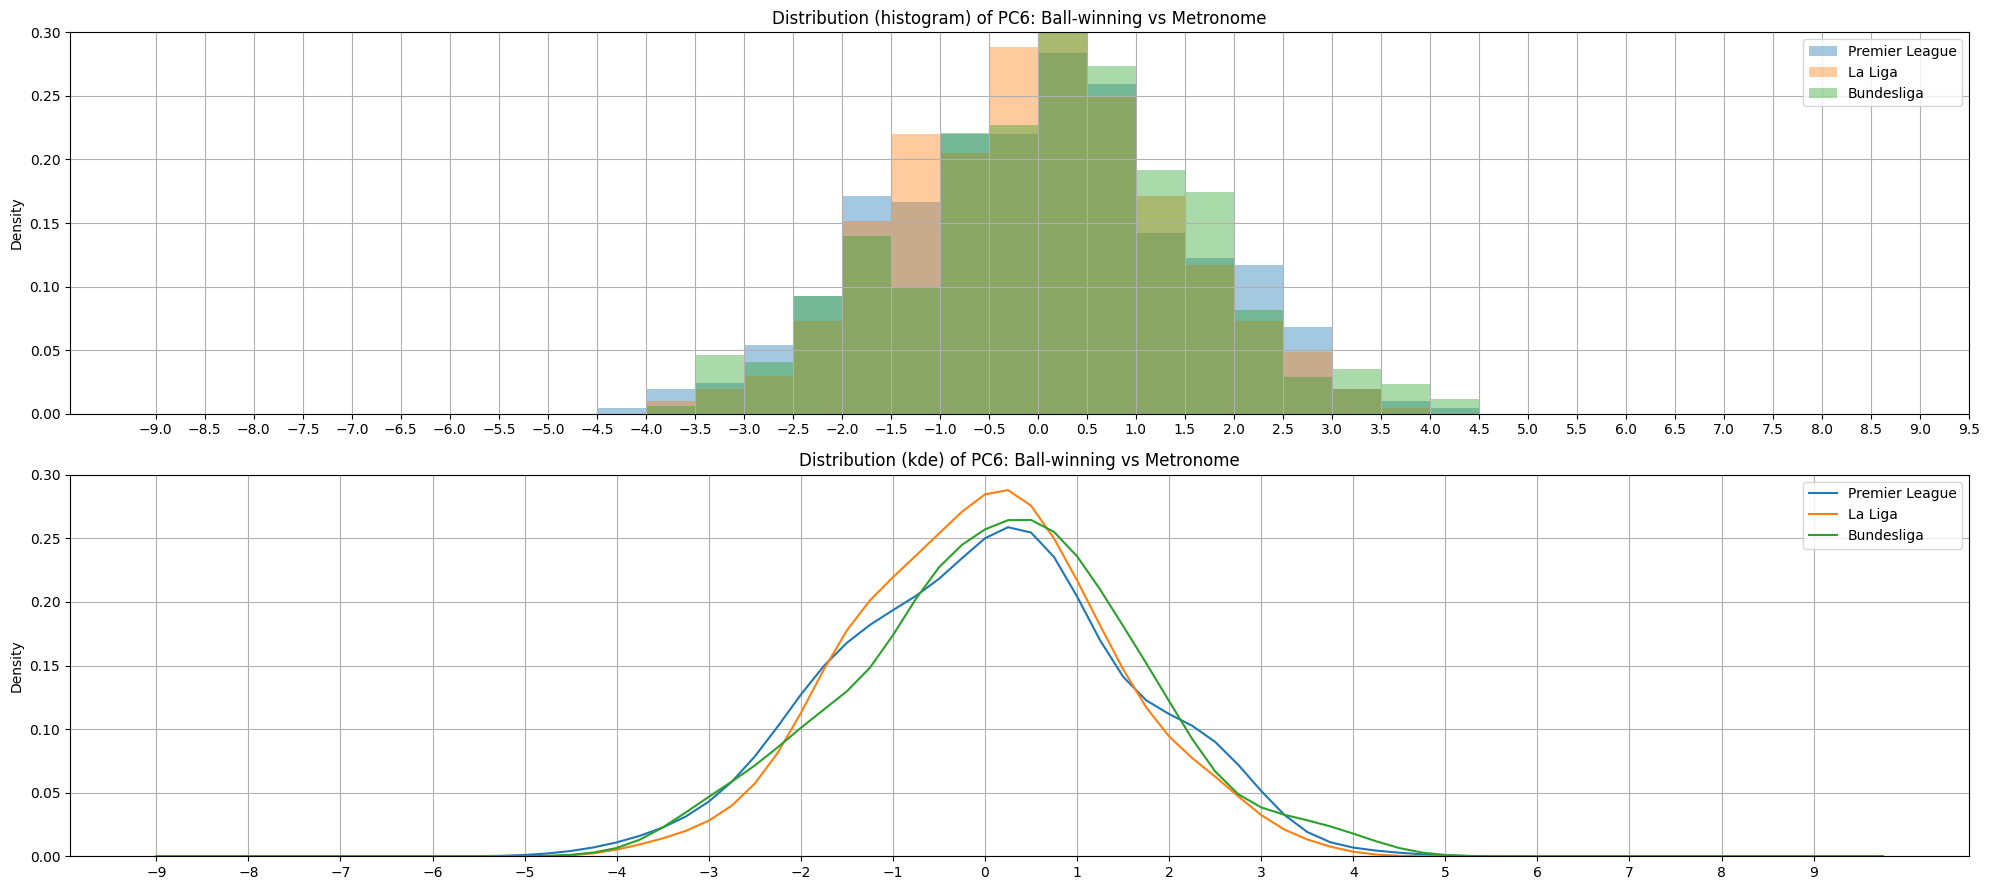

PC7 means
Premier League: 0.2518685871687438
La Liga: 0.18474312671840498
Bundesliga: 0.5992092481197877


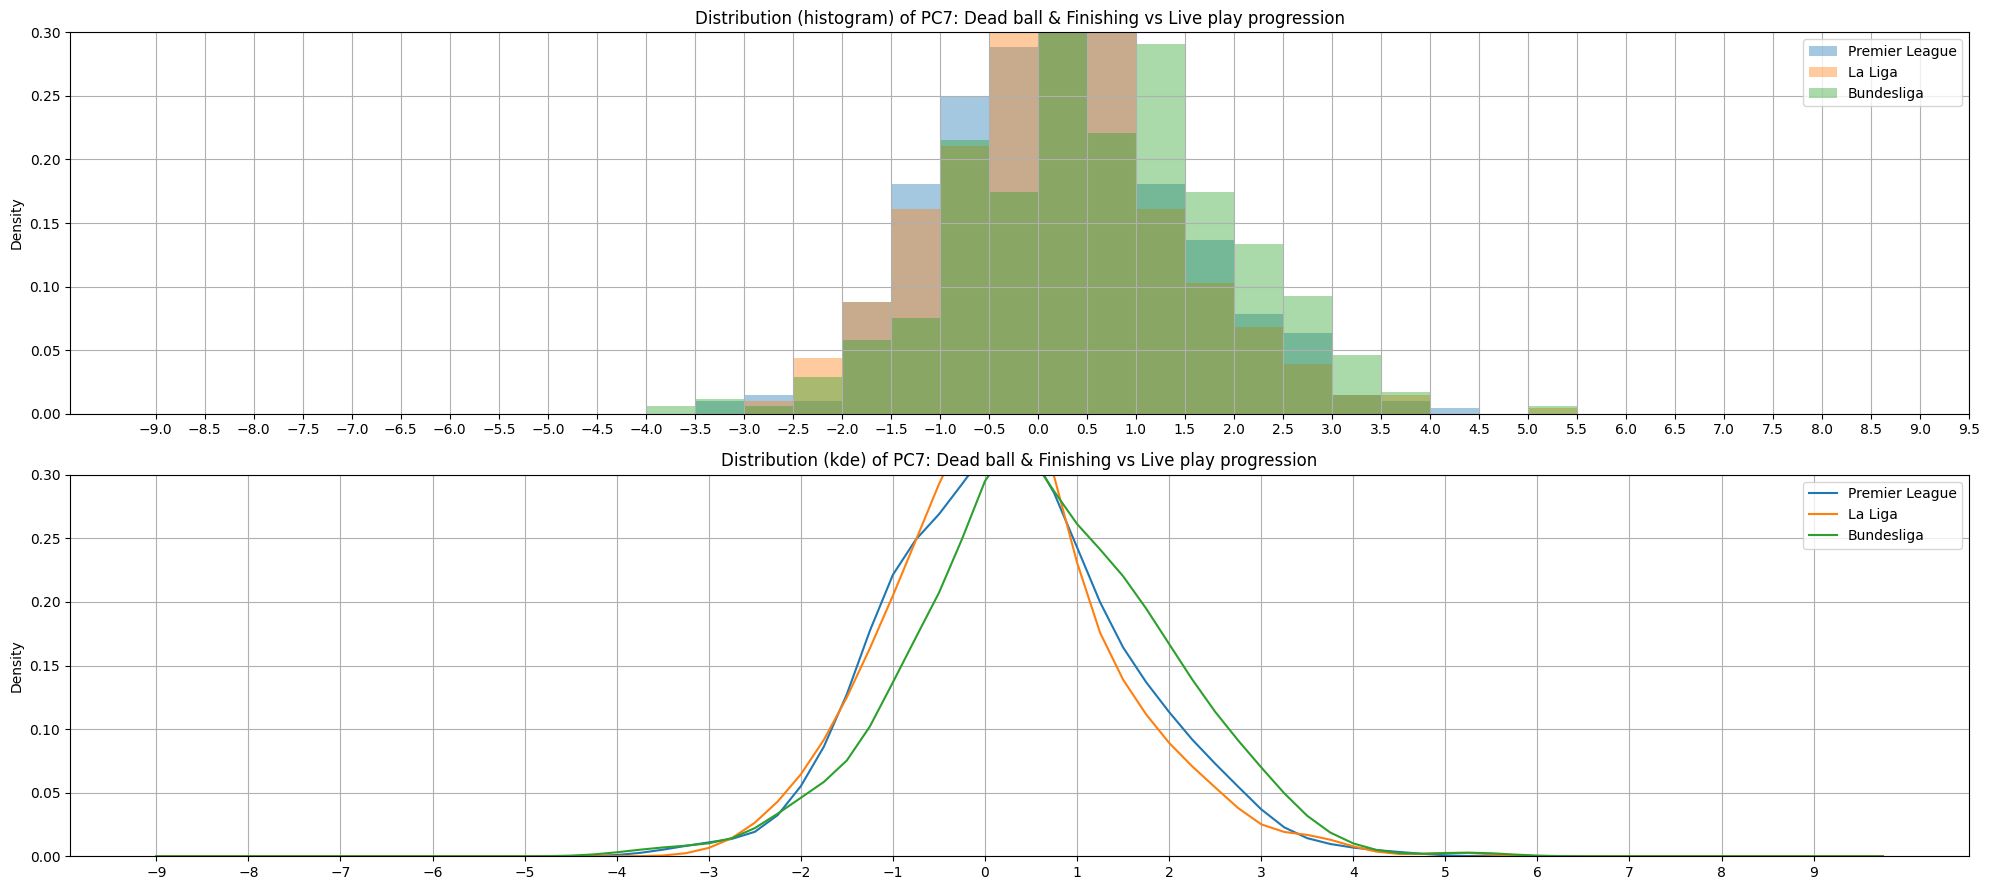

PC8 means
Premier League: 0.07939787667773586
La Liga: -0.2063109438647567
Bundesliga: 0.3073935143805814


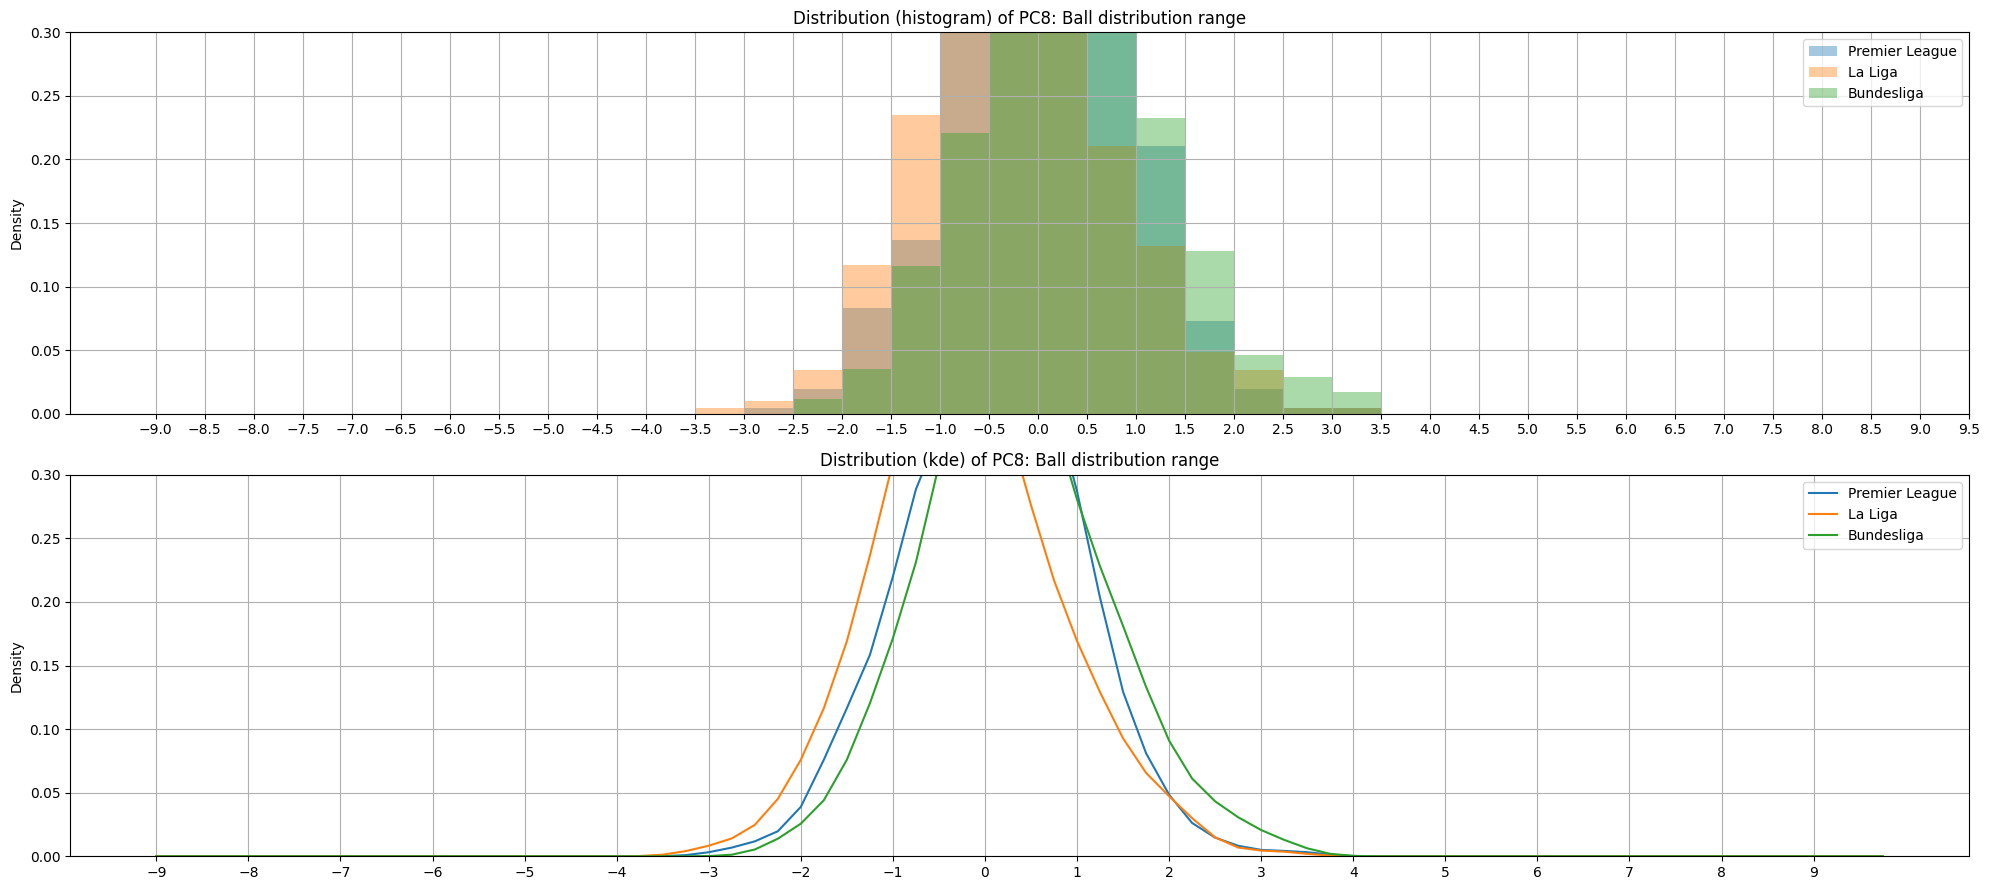

In [12]:
import scipy.stats as stats

leagues_to_plot = np.array(['Premier League', 'La Liga', 'Serie A', 'Ligue 1', 'Bundesliga'])

def plot_league_dist(leagues, n_pc):
    print(f"PC{n_pc} means")
    for league in leagues:
        print(f"{league}:", pc_distributions[(league, n_pc)].mean())

    fig, ax = plt.subplots(2, 1, figsize=(20, 9), tight_layout=True)

    ax[0].set_title(f'Distribution (histogram) of PC{n_pc}: {pc_names[n_pc]}')
    for league in leagues:
        ax[0].hist(pc_distributions[(league, n_pc)], alpha=0.4, bins=np.arange(-9, 9, 0.5), label=league, density=True, histtype='bar')
    ax[0].set_xticks(np.arange(-9, 10, 0.5))
    ax[0].set_ylim(0, 0.3)
    ax[0].set_ylabel("Density")
    ax[0].grid()
    ax[0].legend()

    ax[1].set_title(f'Distribution (kde) of PC{n_pc}: {pc_names[n_pc]}')
    x = np.arange(-9, 10, 0.25)
    for league in leagues:
        density = stats.gaussian_kde(pc_distributions[(league, n_pc)])
        ax[1].plot(x, density(x), label=league)
    ax[1].set_xticks(np.arange(-9, 10, 1))
    ax[1].set_ylim(0, 0.3)
    ax[1].set_ylabel("Density")
    ax[1].grid()
    ax[1].legend()

    plt.show()

for i in range(1, 9):
    plot_league_dist(leagues_to_plot[[0, 1, 4]], i)

In [13]:
X_decom_dict = dict()
for league in leagues:
    league_players = X_trains[league].index
    X_decom_dict[league] = X_train_decomposed.loc[league_players]

In [14]:
X_decom_dict['La Liga']

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52
player,,,,,,,,,,,,,,,,,,,,,
Nemanja Gudelj,-5.234113,1.120156,-0.538314,0.185720,-1.603430,-1.536395,0.777655,-0.243575,-0.595828,-0.563122,...,-0.067863,-0.254989,-0.121414,-0.085963,0.268875,-0.143956,-0.076853,-0.011458,-0.070891,0.085363
Óliver Torres,2.527247,-1.654143,-2.087394,0.564175,1.701768,1.255234,0.579488,-0.900106,0.125811,0.790343,...,-0.082245,0.182774,0.156404,-0.136525,-0.343787,0.183351,0.104045,-0.017484,0.105912,-0.034749
Jesús Navas,1.082532,-1.145077,2.617513,1.314642,2.450158,-1.973962,0.200567,-0.721003,0.843502,-0.084463,...,0.317888,-0.151494,-0.067511,-0.089110,-0.448408,-0.068813,0.053311,-0.028863,0.233555,-0.045739
Marcos Acuña,-1.334833,-4.283741,1.923714,0.010564,1.448109,0.626051,2.306770,-0.376787,0.694869,0.064253,...,-0.134831,-0.012214,0.010834,0.113600,-0.022207,0.129846,0.037034,-0.026410,-0.104497,0.089338
Ivan Rakitić,-1.195469,-3.261820,-1.702114,0.764843,2.030660,-0.551809,0.316271,-0.612837,0.205819,1.215495,...,-0.332688,-0.050124,0.096656,-0.087322,-0.306558,-0.123503,-0.052213,0.015018,0.119215,0.022113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Francis Coquelin,-0.160869,0.803893,-1.589346,-2.797997,-0.560757,0.557370,-0.428952,-0.826849,-0.072665,0.958110,...,-0.564436,0.129525,0.033786,0.258647,0.332573,-0.179092,-0.069346,-0.006837,0.004235,0.035041
Manu Trigueros,-0.956497,-2.248803,-3.635863,-2.252836,1.176950,-1.452306,-0.857236,-0.003114,-1.630931,0.427603,...,-0.229426,0.212163,0.112894,0.282488,0.311846,-0.351913,-0.050321,0.052707,0.052885,0.030669
Arnaut Danjuma,6.710013,4.328714,3.768138,-1.018650,-0.722569,-1.372052,0.150407,-2.757689,-0.715207,-1.793276,...,-0.385076,-0.235063,0.268386,0.049133,-0.137450,0.229726,-0.055640,0.125058,0.358547,0.107994


In [15]:
from scipy.spatial.distance import cdist

def find_closest(search_space: pd.DataFrame, point: pd.Series, n_comparison_pcs: list = None, n_closest: int = 10, return_distances=False):
    # Determining how many pcs to use for comparison
    if n_comparison_pcs is None:
        pc_cols = [f"PC{i}" for i in range(1, 11)]
    else:
        pc_cols = [f"PC{i}" for i in n_comparison_pcs]


    # Calculate the Euclidean distances between the target point and all other points
    distances = cdist(search_space[pc_cols].values, point[pc_cols].astype(float).values.reshape(1, -1), metric='euclidean')

    # Find the indices of the 10 closest points
    closest_indices = distances.argsort(axis=0)[:n_closest, 0]

    if return_distances:
        return pd.Series(distances[closest_indices].flatten(), index=search_space.iloc[closest_indices].index)

    # Get closest points from the original DataFrame
    closest_points = search_space.iloc[closest_indices]
    return closest_points[pc_cols]

In [16]:
aa = find_closest(X_train_decomposed, X_train_decomposed.loc['Vinicius Júnior'], n_comparison_pcs=[1, 2, 3, 4])
display(aa)
display(X_train_decomposed.loc[aa.index])

,PC1,PC2,PC3,PC4
player,,,,
Vinicius Júnior,7.890625,-0.063138,1.317744,0.716177
Tiago Tomás,7.650963,0.426523,1.627604,1.164388
Karim Onisiwo,8.385714,0.516032,1.238263,0.981893
Harvey Barnes,7.491525,0.665403,0.908757,0.742100
Silas Katompa,6.882138,-0.012280,1.689560,0.613121
Emil Ceide,7.409540,-0.077406,2.459749,0.868558
Linton Maina,7.622689,-0.086913,2.397968,1.668801
Takuma Asano,7.316508,0.900660,0.352546,0.856340
Son Heung-min,7.127548,1.074004,1.855662,0.399005


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52
player,,,,,,,,,,,,,,,,,,,,,
Vinicius Júnior,7.890625,-0.063138,1.317744,0.716177,-2.801002,0.745338,0.022680,-0.900533,0.149896,0.960984,...,-0.114355,-0.132492,0.122195,0.104191,-0.050124,0.197476,0.076311,0.192880,-0.004980,-0.040688
Tiago Tomás,7.650963,0.426523,1.627604,1.164388,1.927812,1.589931,0.192451,-0.945253,0.092013,0.211660,...,-0.376988,0.083933,0.224891,-0.055432,-0.167665,-0.119579,0.101509,-0.086317,0.021771,-0.171845
Karim Onisiwo,8.385714,0.516032,1.238263,0.981893,1.412377,0.428092,0.620887,0.498869,0.603960,0.583069,...,-0.134372,-0.102194,-0.074533,-0.225306,0.038524,-0.116673,-0.144815,-0.078716,0.111391,0.073362
Harvey Barnes,7.491525,0.665403,0.908757,0.742100,-1.886691,0.553084,0.099446,0.638083,-0.858282,0.794251,...,-0.052497,-0.145130,0.037215,-0.015482,-0.281415,0.145562,0.150672,-0.057827,-0.100450,-0.019883
Silas Katompa,6.882138,-0.012280,1.689560,0.613121,-1.591786,1.829748,-0.363165,-0.283901,-0.554118,-0.295445,...,-0.142305,-0.181717,-0.114881,0.121246,-0.175710,0.301019,0.180929,-0.017750,0.094784,0.021538
Emil Ceide,7.409540,-0.077406,2.459749,0.868558,-2.581378,-0.265063,-2.043783,1.580732,-0.992665,0.592298,...,-0.416457,-0.139457,0.268737,0.015906,-0.007414,0.008103,0.088943,-0.169730,0.307012,-0.022444
Linton Maina,7.622689,-0.086913,2.397968,1.668801,-1.157434,0.485859,-0.532460,-0.204753,-0.445420,-0.029226,...,0.273666,-0.167838,0.267504,0.013238,-0.183806,-0.060106,0.185404,0.052565,-0.040017,-0.006503
Takuma Asano,7.316508,0.900660,0.352546,0.856340,-0.167755,0.395183,-0.615742,0.495909,-0.055771,0.214785,...,-0.100347,0.027517,-0.024236,-0.187655,-0.249628,0.069743,-0.095885,-0.102539,0.029435,0.027417
Son Heung-min,7.127548,1.074004,1.855662,0.399005,-0.698345,-0.085874,0.446961,-1.248109,-1.792505,-0.733565,...,-0.111592,-0.088580,-0.116065,-0.094409,-0.002885,0.033205,0.110836,-0.142045,0.030847,-0.069297


## Creating a ranking of Teams by avg PC value

In [17]:
league = "Premier League"
league_teams = list(data[league]['team'].unique())
team_means_dict = dict()


for team in league_teams:
    team_players = list(set(data[league].query(f'team == "{team}"').index).intersection(set(X_train_decomposed.index)))
    team_avg_value = (X_train_decomposed.loc[team_players].reset_index().drop_duplicates('player').set_index('player').multiply(data['Premier League'].query(f'team == "{team}"').loc[team_players]['90s'], axis=0) / 380).mean()
    team_means_dict[team] = team_avg_value

In [18]:
attack_defense = [(team, team_means_dict[team]['PC1']) for team in league_teams]
sorted(attack_defense, key=lambda x: x[1])

[('Wolves', -0.01543144661972005),
 ("Nott'ham Forest", -0.010471049518020461),
 ('Everton', -0.009478572341114664),
 ('West Ham', -0.007985846760241198),
 ('Bournemouth', -0.004658356630993172),
 ('Crystal Palace', -0.003934587741675755),
 ('Chelsea', -0.002104391824396943),
 ('Leicester City', 0.0008673290769383215),
 ('Liverpool', 0.0015091220392366596),
 ('Tottenham', 0.0026466481153750777),
 ('Fulham', 0.002729382214093213),
 ('Aston Villa', 0.005276436546170424),
 ('Manchester City', 0.007869907276682676),
 ('Manchester Utd', 0.007953923118415182),
 ('Southampton', 0.009315341755286416),
 ('Arsenal', 0.0096277964866309),
 ('Newcastle Utd', 0.010098816299969615),
 ('Leeds United', 0.010607184695306752),
 ('Brentford', 0.01138756307513805),
 ('Brighton', 0.01749641463160052)]

The differences aren't meaningful enough to draw any serious conclusions from them